## Mínimos cuadrados

### Linear Least square and chi-square function

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data = np.load('fit_exercise.npy') #Cargamos el archivo de datos
n = len(data[0])
p = np.arange(0,11,0.1) #Esto solo es un arreglo para evaluar el ajuste en la gráfica

### Los datos usados están compuestos de un arreglo de 3 subarreglos de 50 mediciones, donde el primer subarreglo son los datos de $x$, el segundo son de $y$ y el tercero son los errores en $y$

In [23]:
plt.style.use('dark_background')
#Esto es solo la función para graficar
#funcion(x,y,errores,vector p,pendiente,parámetro libre,error pendiente,error param. libre)
def scat(u,v,er,aj,m,c,da,db): 
    plt.rcParams['figure.figsize'] = (10,5)
    plt.errorbar(u, v, yerr=er, xerr = 0, fmt='o', color='yellow')
    if m != 0:
        plt.plot(aj,(m*aj+c),color='blue')
        plt.text(8,6,'$y = ax + b$',color='white',fontsize=15,bbox={'facecolor':'black','pad':10})
    if da != 0:
        plt.plot(aj,((m+da)*aj+c+db),'--',color='red')
        plt.plot(aj,((m-da)*aj+c-db),'--',color='red')
    plt.ylim((-7, 9))
    plt.xlim((0, 10.2))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

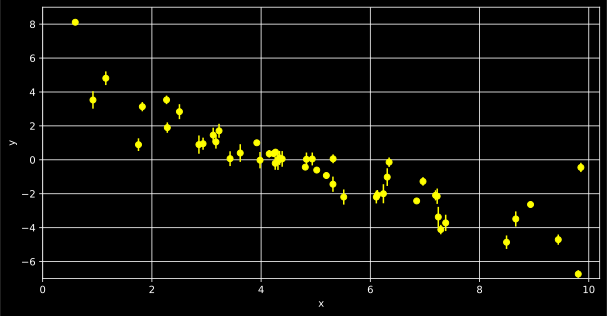

In [13]:
scat(data[0],data[1],data[2],0,0,0,0,0)

## Viendo los datos, se puede hacer un ajuste lineal

### Primero usaremos el método de mínimos cuadrados de orden cero, donde:
# $a = \frac{\sum{x}\sum{y}\ -\ n\sum{xy}}{(\sum{x})^2- \ n\sum{x^2}} \; , \; b = \frac{\sum{x}\sum{xy}\ -\ \sum{y}\sum{x^2}}{(\sum{x})^2- \ n\sum{x^2}}$
# $\sigma_x = \frac{\sum{\Delta x}}{n} \;, \; \sigma_y = \frac{\sum{\Delta y}}{n} \;, \; \sigma = \sqrt{\sigma_y^2+m^2\sigma_x^2}$
# $\Delta a = \sqrt{\frac{n\sigma^2}{n\sum{x^2}-(\sum{x})^2}} \;, \; \Delta b = \sqrt{\frac{\sigma^2 \sum{x^2}}{n\sum{x^2}-(\sum{x})^2}}$

In [14]:
xx = sum(data[0]*data[0])
xy = sum(data[0]*data[1])
x = sum(data[0])
y = sum(data[1])
e = sum(data[2])/n
ea = np.sqrt((n*e*e)/(n*xx-x*x))
eb = np.sqrt((e*e*xx)/(n*xx-x*x))
a = (x*y - n*xy)/(x*x-n*xx)
b = (x*xy - y*xx)/(x*x-n*xx)

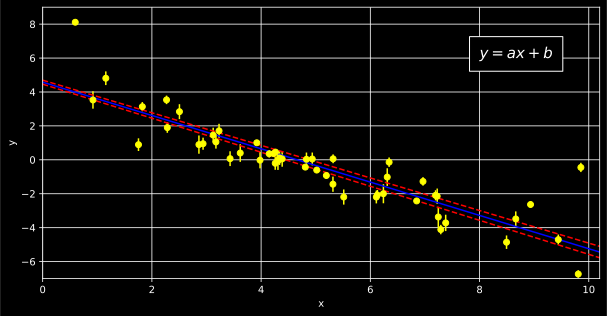

In [24]:
scat(data[0],data[1],data[2],p,a,b,ea,eb)

In [16]:
print('a = ',a,'±',ea,'\nb = ',b,'±',eb)

a =  -0.9821623517930458 ± 0.02132195875032384 
b =  4.577859303753377 ± 0.11792910052223708


## Ahora, minimizando la función chi-square para $y = ax + b$
### Para minimizar otra función solo se cambia la función en func()

# $\chi^2 = \sum_i^n{\frac{(y_i - y(x_i,\theta))^2}{\sigma_{y_i}^2}} = \sum_i^n{\frac{(y_i - ax_i - b)^2}{\sigma_{y_i}^2}}$
### Donde $\theta$ son los parámetros libre y $\sigma_{y_i}^2$ es la varianza en y

In [17]:
def func(w):
    s = 0
    w1 = w[0]
    w2 = w[1]
    va = np.var(data[1])
    for i in range(n):
        s+=(data[1,i]-w2-data[0,i]*w1)**2/va
    return s

In [18]:
w0 = [0,0]
sol = minimize(func,w0)
print('a = ',sol.x[0],'\nb = ',sol.x[1])

a =  -0.982162360083309 
b =  4.577859293897946


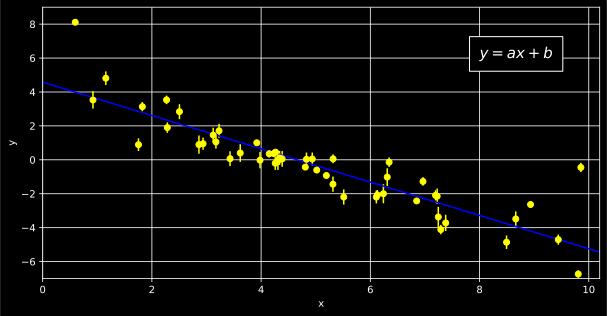

In [19]:
scat(data[0],data[1],data[2],p,sol.x[0],sol.x[1],0,0)

## La diferencia entre ambos ajustes es mínima en este caso, del orden de $10^{-9}$

In [20]:
print(abs(a-sol.x[0]),abs(b-sol.x[1]))

8.290263253663e-09 9.855431137850701e-09
